'''


    @Author: Shivraj Yelave
    @Date: 30-09-24
    @Last modified by: Shivraj Yelave
    @Last modified time: 
    @Title: Simple Linear Regression task 2


'''


In [153]:
import numpy as np
import pandas as pd
import statistics as st
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
df = pd.read_csv('bike_sharing.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [155]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [157]:
req_df = df[['atemp','cnt']]
req_df.head()

,atemp,cnt
0,0.2879,16
1,0.2727,40
2,0.2727,32
3,0.2879,13
4,0.2879,1


In [158]:
req_df.isna().sum()

atemp    0
cnt      0
dtype: int64

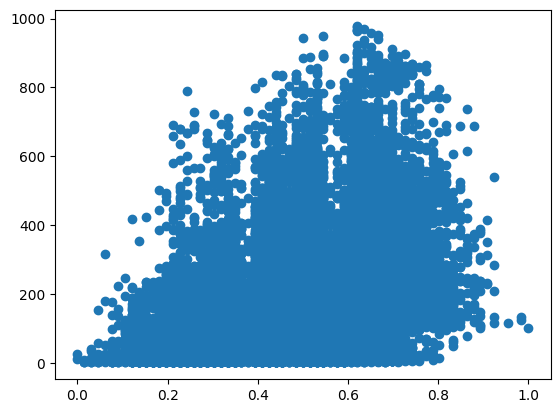

In [159]:
plt.scatter(req_df['atemp'],req_df['cnt'])
plt.show()

<Axes: ylabel='cnt'>

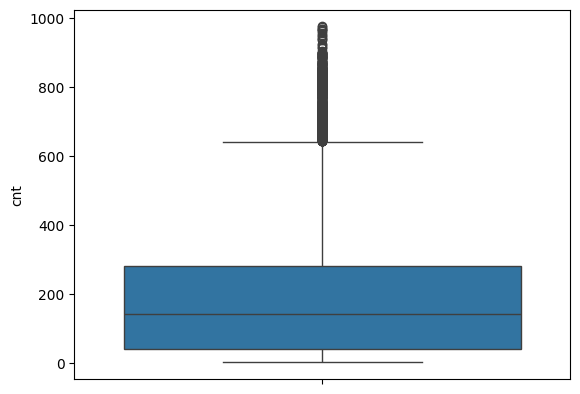

In [160]:
sns.boxplot(req_df['cnt'])


<Axes: ylabel='cnt'>

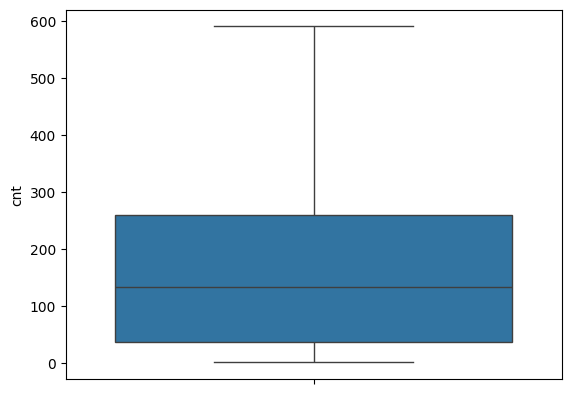

In [161]:

Q1 = req_df['cnt'].quantile(0.25)
Q3 = req_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
filtered_df = req_df[(req_df['cnt'] >= (Q1 - 1.29 * IQR)) & (req_df['cnt'] <= (Q3 + 1.29 * IQR))]
sns.boxplot(filtered_df['cnt'])


In [162]:

print(filtered_df.isna().sum())
print(filtered_df.shape)

atemp    0
cnt      0
dtype: int64
(16674, 2)


In [163]:

# Initialize the scaler
scalar = MinMaxScaler()

# Fit and transform the 'atemp' and 'cnt' columns
scaled_atemp = scalar.fit_transform(filtered_df[['atemp']])
scaled_count = scalar.fit_transform(filtered_df[['cnt']])

# Create a DataFrame for scaled values
scaled_df = pd.DataFrame({
    'atemp': scaled_atemp.flatten(),
    'Count': scaled_count.flatten()
})

# Display the shape of the scaled DataFrame
print(scaled_df.shape)

# Display the scaled DataFrame
scaled_df.head()


(16674, 2)


,atemp,Count
0,0.2879,0.025424
1,0.2727,0.066102
2,0.2727,0.052542
3,0.2879,0.020339
4,0.2879,0.000000


In [164]:

scaled_df.isna().sum()

atemp    0
Count    0
dtype: int64

In [165]:
X = scaled_df[['atemp']]
print(X)
y = scaled_df[['Count']]
print(y)

        atemp
0      0.2879
1      0.2727
2      0.2727
3      0.2879
4      0.2879
...       ...
16669  0.2576
16670  0.2576
16671  0.2576
16672  0.2727
16673  0.2727

[16674 rows x 1 columns]
          Count
0      0.025424
1      0.066102
2      0.052542
3      0.020339
4      0.000000
...         ...
16669  0.200000
16670  0.149153
16671  0.150847
16672  0.101695
16673  0.081356

[16674 rows x 1 columns]


In [166]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [167]:
model = LinearRegression()

In [168]:


# Now fit the model
model.fit(X_train, y_train)


LinearRegression()

In [169]:
y_predict = model.predict(X_test)

In [170]:

# Evaluate the model
mse = mean_squared_error(y_test, y_predict)  # Mean Squared Error
r2 = r2_score(y_test, y_predict)  # R-squared value

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0517560645227249
R-squared: 0.15306924672695033


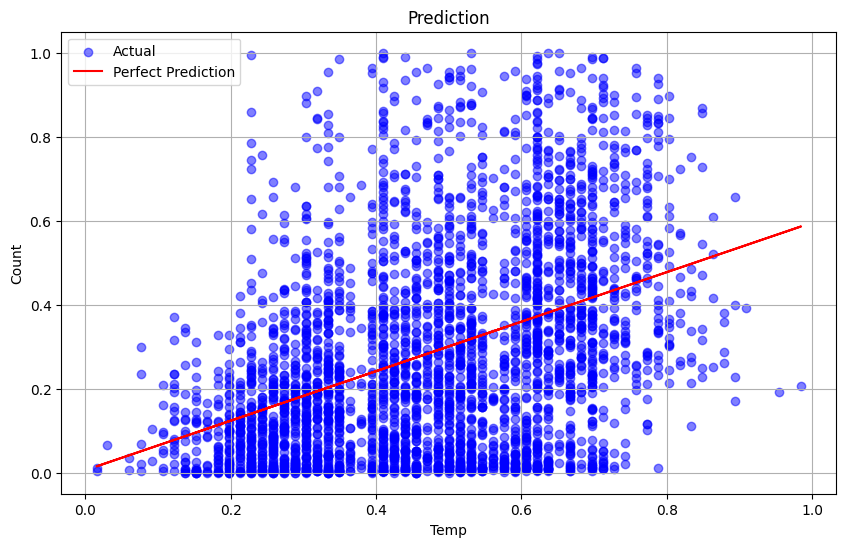

In [173]:

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')

# Plot the line of best fit
plt.plot(X_test,y_predict, color='red',label='Perfect Prediction')

# Add labels and title
plt.title('Prediction')
plt.xlabel('Temp')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
